In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
from matplotlib import pyplot as plt
import h5py
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import lagrange
from dg_maxwell import global_variables as gvar
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh
from dg_maxwell import utils

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [2]:
def print_with_index(datas):
    datas = np.array(datas)
    for index, row in enumerate(datas):
        print(index, '\t->', end = '\t')
        for data in row:
            print(np.round(data, 3), end = '\t')
        print()
    print()

In [3]:
params.mesh_file = '../read_and_plot_mesh/mesh/square_10_10.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 441 nodes.
gmshTranslator: Mesh has 144 elements.
gmshTranslator: Processed 589 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


gmshTranslator: Ending


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


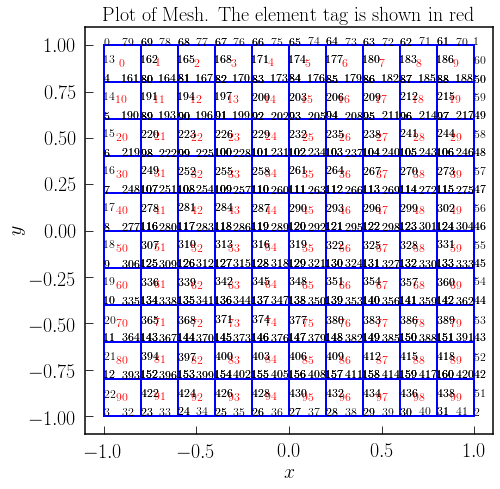

In [4]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

# Prototype to detect an edge of a quadrangle

In [17]:
elements = advec_var.elements

element_tag = 0

x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

edge_id = 0
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 1
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


edge_id = 2
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 3
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


In [18]:
x_edge_c = af.mean(x_edge, dim = 1)
y_edge_c = af.mean(y_edge, dim = 1)

x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

In [19]:
delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

In [20]:
delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

In [21]:
edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
edge_angle = edge_angle + angle_less_than_zero * 360
print(edge_angle)

arrayfire.Array()
Type: double

[16 4 1 1]
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000     0.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  180.0000    90.0000   360.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 




In [22]:
# Identifying physical right edges
physical_right_edge = (edge_angle >= 315.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle <= 45)

# Identifying physical top edges
physical_top_edge = (edge_angle >= 45) * (edge_angle <= 135)

# Identifying physical left edges
physical_left_edge = (edge_angle >= 135) * (edge_angle <= 225)

# Identifying physical left edges
physical_bottom_edge = (edge_angle >= 225) * (edge_angle < 315)

In [23]:
print_with_index(physical_top_edge)

0 	->	0	0	0	1	
1 	->	0	0	0	1	
2 	->	0	0	0	1	
3 	->	0	0	0	1	
4 	->	0	0	0	1	
5 	->	0	0	0	1	
6 	->	0	0	0	1	
7 	->	0	0	0	1	
8 	->	0	0	1	0	
9 	->	0	0	1	0	
10 	->	0	0	1	0	
11 	->	0	0	1	0	
12 	->	0	1	0	0	
13 	->	0	1	0	0	
14 	->	0	1	0	0	
15 	->	0	1	0	0	



In [24]:
edge_reorder = physical_left_edge * 1 + physical_bottom_edge * 2 + physical_right_edge * 3 + physical_top_edge * 4 - 1
print_with_index(edge_reorder)

0 	->	0	1	2	3	
1 	->	0	1	2	3	
2 	->	0	1	2	3	
3 	->	0	1	2	3	
4 	->	0	1	2	3	
5 	->	0	1	2	3	
6 	->	0	1	2	3	
7 	->	0	1	2	3	
8 	->	1	2	3	0	
9 	->	1	2	3	0	
10 	->	1	2	3	0	
11 	->	1	2	3	0	
12 	->	0	3	2	1	
13 	->	0	3	2	1	
14 	->	0	3	2	1	
15 	->	0	3	2	1	



# Writing the formal code to identify the edges of an element

In [11]:
def identify_element_physical_edges(elements, advec_var):
    '''
    For an element it tdentifies the left, bottom, right,
    and top edges physically. It assigns each edge of an
    element an id depending on the table shown below.
    +-------------+----------------------+
    | **Edge**    | **Assigned Edge ID** |
    +-------------+----------------------+
    | Left Edge   | :math:`0`            |
    +-------------+----------------------+
    | Bottom Edge | :math:`1`            |
    +-------------+----------------------+
    | Right Edge  | :math:`2`            |
    +-------------+----------------------+
    | Top Edge    | :math:`3`            |
    +-------------+----------------------+
    
    Parameters
    ----------
    elements : np.array([N_elements 9], dtype = np.int)
               The element array returned by
               :py:meth:`dg_maxwell.msh_parser.read_order_2_msh`.

    advec_var : :py:meth:`dg_maxwell.global_variables.advection_variables`

    Returns
    -------
    physical_edge_identity : af.Array([N_elements 4 1 1], dtype = af.Dtype.int64)
                             The physical edge id for each edge of each elements.
                             See table above.
    '''
    x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
    y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

    for edge_id in np.arange(4):
        x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                                      edge_id, advec_var))
        y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                                      edge_id, advec_var))

    ###################################################################################
    ###################################################################################

    x_edge_c = af.mean(x_edge, dim = 1)
    y_edge_c = af.mean(y_edge, dim = 1)

    x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
    y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

    ###################################################################################
    ###################################################################################

    delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
    delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

    ###################################################################################
    ###################################################################################

    delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

    ###################################################################################
    ###################################################################################

    edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
    angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
    edge_angle = edge_angle + angle_less_than_zero * 360
#     print(edge_angle)

    ###################################################################################
    ###################################################################################

    # Identifying physical right edges
    physical_right_edge = (edge_angle >= 315.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle <= 45)

    # Identifying physical top edges
    physical_top_edge = (edge_angle >= 45) * (edge_angle <= 135)

    # Identifying physical left edges
    physical_left_edge = (edge_angle >= 135) * (edge_angle <= 225)

    # Identifying physical left edges
    physical_bottom_edge = (edge_angle >= 225) * (edge_angle < 315)

    ###################################################################################
    ###################################################################################

    physical_edge_identity = physical_left_edge * 1 + physical_bottom_edge * 2 + physical_right_edge * 3 + physical_top_edge * 4 - 1
#     print(physical_edge_identity)
    
    return physical_edge_identity

# Testing the identify_element_edge function

In [9]:
elements = advec_var.elements
identify_element_physical_edges(elements, advec_var)

arrayfire.Array()
Type: long int
Dims: (16, 4)

# Formal code to get the edge nodes

In [12]:
def get_edge_nodes(elements, element_tag, edge_id):
    '''
    Gives the edge nodes of an element for an edge id.
    To find what each edge id represents, see this
    :py:meth:`dg_maxwell.msh_parser.edge_location`.
    
    Parameters
    ----------
    elements : np.array([N_elements 9], dtype = np.int)
               The element array returned by
               :py:meth:`dg_maxwell.msh_parser.read_order_2_msh`.

    element_tag : unsigned int
                  The element tag for which an edge has to be returned.

    edge_id : unsigned int
              The edge to look for in an element

    Return
    ------
    edge_nodes_tag : np.Array([3], dtype= np.int64)
                     The node tag which makes up an edge.
    '''
    edge_nodes_tag = None
    
    if edge_id < 3:
        edge_nodes_tag =  elements[element_tag, edge_id * 2:(edge_id * 2 + 3)]
    else:
        edge_nodes_tag = np.append(elements[element_tag, edge_id * 2:(edge_id * 2 + 2)],
                                   elements[element_tag, 0])
    
    return edge_nodes_tag



# Prototype implementation for rearranging the edge nodes for each edge

In [6]:
# Rearrange the edge nodes

# Rearrange the left edge nodes
element_tag_left_edge = get_edge_nodes(elements,
                                       element_tag = 12,
                                       edge_id = 0)

# Arrange the nodes for left nodes
y_nodes = advec_var.nodes[element_tag_left_edge][:, 1]

y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
y_nodes_dic_node_tag[:, 0] = y_nodes
y_nodes_dic_node_tag[:, 1] = element_tag_left_edge

y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
left_edge_nodes = np.flipud(element_tag_left_edge[y_nodes_argsort[:, 0]])

# [LOOKS FINE]

# Rearrange the bottom edge nodes.
element_tag_bottom_edge = get_edge_nodes(elements,
                                         element_tag = 12,
                                         edge_id = 1)

# Arrange the nodes for bottom nodes
x_nodes = advec_var.nodes[element_tag_bottom_edge][:, 0]

x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
x_nodes_dic_node_tag[:, 0] = x_nodes
x_nodes_dic_node_tag[:, 1] = element_tag_bottom_edge

print(x_nodes_dic_node_tag)
x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
bottom_edge_nodes = element_tag_bottom_edge[x_nodes_argsort[:, 0]]
print(bottom_edge_nodes)

# [LOOKS FINE]

# Rearrange the right edge nodes
element_tag_right_edge = get_edge_nodes(elements,
                                        element_tag = 12,
                                        edge_id = 2)

# Arrange the nodes for right nodes
y_nodes = advec_var.nodes[element_tag_right_edge][:, 1]

y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
y_nodes_dic_node_tag[:, 0] = y_nodes
y_nodes_dic_node_tag[:, 1] = element_tag_right_edge

y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
right_edge_nodes = element_tag_right_edge[y_nodes_argsort[:, 0]]

print(right_edge_nodes)
# [LOOKS FINE]


# Rearrange the top edge nodes.
element_tag_top_edge = get_edge_nodes(elements,
                                      element_tag = 12,
                                      edge_id = 3)

# Arrange the nodes for top nodes
x_nodes = advec_var.nodes[element_tag_top_edge][:, 0]

x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
x_nodes_dic_node_tag[:, 0] = x_nodes
x_nodes_dic_node_tag[:, 1] = element_tag_top_edge

print(x_nodes_dic_node_tag)
x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
top_edge_nodes = np.flipud(element_tag_top_edge[x_nodes_argsort[:, 0]])
print(top_edge_nodes)

# [LOOKS FINE]



NameError: name 'elements' is not defined

# Writing a formal code for the edge_nodes functions for formal ordering

In [13]:
def edge_nodes_reordered(elements, element_tag, edge_id,
                         return_as_edge, advec_var):
    '''
    Finds the edge nodes of an element and reorders the nodes of an edge
    according to the requested ``return_as_edge`` variable.
    
    Parameters
    ----------
    elements : np.array([N_elements 9], dtype = np.int)
               The element array returned by
               :py:meth:`dg_maxwell.msh_parser.read_order_2_msh`.

    element_tag : unsigned int
                  The element tag for which an edge has to be returned.

    edge_id : unsigned int
              The edge to look for in an element

    return_as_edge : unsigned int
                     The edge as which the ``edge_id`` edge
                     has to be returned.

    advec_var : :py:meth:`dg_maxwell.global_variables.advection_variables`

    Returns
    -------
    edge_nodes_tag : np.Array([3], dtype= np.int64)
                     The edge with the rearranged node order.
    '''
    edge_nodes_tag = get_edge_nodes(elements, element_tag, edge_id)
    # Left edge case
    if return_as_edge == 0:

        # Rearrange the left edge nodes
        element_tag_left_edge = edge_nodes_tag

        # Arrange the nodes for left nodes
        y_nodes = advec_var.nodes[element_tag_left_edge][:, 1]

        y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
        y_nodes_dic_node_tag[:, 0] = y_nodes
        y_nodes_dic_node_tag[:, 1] = element_tag_left_edge

        y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
        left_edge_nodes = np.flipud(element_tag_left_edge[y_nodes_argsort[:, 0]])

        edge_nodes_tag = left_edge_nodes
    # [LOOKS FINE]

    # Bottom edge case
    # Bottom edge case
    if return_as_edge == 1:
        # Rearrange the bottom edge nodes.
        element_tag_bottom_edge = edge_nodes_tag

        # Arrange the nodes for bottom nodes
        x_nodes = advec_var.nodes[element_tag_bottom_edge][:, 0]

        x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
        x_nodes_dic_node_tag[:, 0] = x_nodes
        x_nodes_dic_node_tag[:, 1] = element_tag_bottom_edge

        x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
        bottom_edge_nodes = element_tag_bottom_edge[x_nodes_argsort[:, 0]]
        
        edge_nodes_tag = bottom_edge_nodes
        # [LOOKS FINE]

    # Right edge case
    if return_as_edge == 2:
        # Rearrange the right edge nodes
        element_tag_right_edge = edge_nodes_tag

        # Arrange the nodes for right nodes
        y_nodes = advec_var.nodes[element_tag_right_edge][:, 1]

        y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
        y_nodes_dic_node_tag[:, 0] = y_nodes
        y_nodes_dic_node_tag[:, 1] = element_tag_right_edge

        y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
        right_edge_nodes = element_tag_right_edge[y_nodes_argsort[:, 0]]

        edge_nodes_tag = right_edge_nodes
        # [LOOKS FINE]

    # Top edge case
    if return_as_edge == 3:
        # Rearrange the right edge nodes
        element_tag_top_edge = edge_nodes_tag

        # Arrange the nodes for top nodes
        x_nodes = advec_var.nodes[element_tag_top_edge][:, 0]

        x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
        x_nodes_dic_node_tag[:, 0] = x_nodes
        x_nodes_dic_node_tag[:, 1] = element_tag_top_edge

        x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
        top_edge_nodes = np.flipud(element_tag_top_edge[x_nodes_argsort[:, 0]])
        
        edge_nodes_tag = top_edge_nodes
        # [LOOKS FINE]

    return edge_nodes_tag

# Testing edge_nodes_reordered functions
- Tested for an element in each of the four parts of the non-contiguous mesh. It works!

In [15]:
elements = advec_var.elements
element_tag = 12
edge_id = 3
return_as_edge = 1

print(edge_nodes_reordered(elements, element_tag, edge_id, return_as_edge))

[ 8 40 39]


# Implement the function to rearrange the edges for every elements

In [25]:
print_with_index(edge_reorder)

0 	->	0	1	2	3	
1 	->	0	1	2	3	
2 	->	0	1	2	3	
3 	->	0	1	2	3	
4 	->	0	1	2	3	
5 	->	0	1	2	3	
6 	->	0	1	2	3	
7 	->	0	1	2	3	
8 	->	1	2	3	0	
9 	->	1	2	3	0	
10 	->	1	2	3	0	
11 	->	1	2	3	0	
12 	->	0	3	2	1	
13 	->	0	3	2	1	
14 	->	0	3	2	1	
15 	->	0	3	2	1	



In [26]:
new_element_edge_ordering = np.zeros(advec_var.elements.shape, dtype = np.int64)
edge_reorder = identify_element_physical_edges(elements, advec_var)

for element_tag in np.arange(advec_var.elements.shape[0]):
    for edge_id in np.arange(4):
        return_as_edge_id = int(af.sum(edge_reorder[element_tag, edge_id]))
        new_element_edge_ordering[element_tag, return_as_edge_id * 2:(return_as_edge_id * 2 + 3)] = \
            edge_nodes_reordered(elements, element_tag, edge_id, return_as_edge = af.sum(edge_reorder[element_tag, edge_id]))

print_with_index(new_element_edge_ordering)

0 	->	0	10	9	46	45	47	30	32	0	
1 	->	30	47	45	49	42	44	7	31	30	
2 	->	9	11	1	34	33	51	45	46	9	
3 	->	45	51	33	35	8	43	42	49	45	
4 	->	1	13	12	55	54	56	33	34	1	
5 	->	33	56	54	58	36	37	8	35	33	
6 	->	12	14	2	16	15	60	54	55	12	
7 	->	54	60	15	17	3	38	36	58	54	
8 	->	36	38	3	19	18	64	63	65	36	
9 	->	8	37	36	65	63	67	39	40	8	
10 	->	63	64	18	20	4	22	21	69	63	
11 	->	39	67	63	69	21	23	5	41	39	
12 	->	42	43	8	40	39	74	72	73	42	
13 	->	72	74	39	41	5	25	24	76	72	
14 	->	7	44	42	73	72	78	27	29	7	
15 	->	27	78	72	76	24	26	6	28	27	



# Write a formal code to get rearrange the element edges

In [14]:
def rearrange_element_edges(elements, advec_var):
    '''
    In a mesh read from mesh parser none of the edge have the sense of the
    their physical identity, i.e., they don't know whether they are left,
    bottom, right and top edge. This function reads the original mesh and
    rearranges the nodes of an element such that the first edge is always
    the physically located left edge, second edge is the physically located
    bottom edge, third edge is the physically located right edge, and the
    fourth edge is the physically located top edge.
    
    Parameters
    ----------
    elements : np.array([N_elements 9], dtype = np.int)
               The element array returned by
               :py:meth:`dg_maxwell.msh_parser.read_order_2_msh`.

    advec_var : :py:meth:`dg_maxwell.global_variables.advection_variables`

    Returns
    -------
    new_element_edge_ordering : np.Array(advec_var.elements.shape, dtype = np.int64)
                                Elements with reordered edges.
    '''
    new_element_edge_ordering = np.zeros(advec_var.elements.shape, dtype = np.int64)
    edge_reorder = identify_element_physical_edges(elements, advec_var)

    for element_tag in np.arange(advec_var.elements.shape[0]):
        for edge_id in np.arange(4):
            return_as_edge_id = int(af.sum(edge_reorder[element_tag, edge_id]))
            new_element_edge_ordering[element_tag, return_as_edge_id * 2:(return_as_edge_id * 2 + 3)] = \
                edge_nodes_reordered(elements, element_tag, edge_id,
                                     return_as_edge = af.sum(edge_reorder[element_tag, edge_id]),
                                    advec_var = advec_var)
    
    return new_element_edge_ordering


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


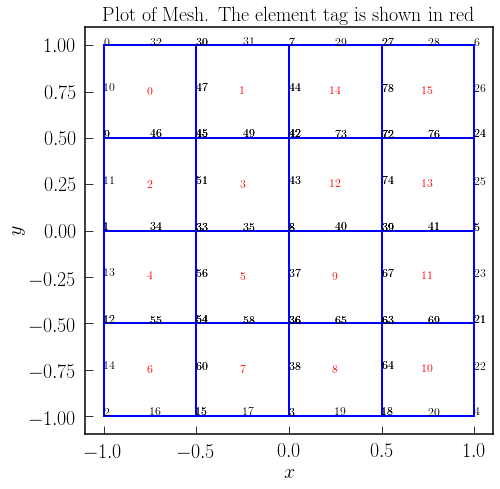

In [28]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

In [5]:
print_with_index(msh_parser.rearrange_element_edges(advec_var.elements, advec_var) - advec_var.elements)

0 	->	0	0	0	0	0	0	0	0	-163	
1 	->	0	0	0	0	0	0	0	0	-97	
2 	->	0	0	0	0	0	0	0	0	-101	
3 	->	0	0	0	0	0	0	0	0	-105	
4 	->	0	0	0	0	0	0	0	0	-109	
5 	->	0	0	0	0	0	0	0	0	-113	
6 	->	0	0	0	0	0	0	0	0	-117	
7 	->	0	0	0	0	0	0	0	0	-121	
8 	->	0	0	0	0	0	0	0	0	-125	
9 	->	0	0	0	0	0	0	0	0	-128	
10 	->	0	0	0	0	0	0	0	0	-188	
11 	->	0	0	0	0	0	0	0	0	-115	
12 	->	0	0	0	0	0	0	0	0	-117	
13 	->	0	0	0	0	0	0	0	0	-119	
14 	->	0	0	0	0	0	0	0	0	-121	
15 	->	0	0	0	0	0	0	0	0	-123	
16 	->	0	0	0	0	0	0	0	0	-125	
17 	->	0	0	0	0	0	0	0	0	-127	
18 	->	0	0	0	0	0	0	0	0	-129	
19 	->	0	0	0	0	0	0	0	0	-130	
20 	->	0	0	0	0	0	0	0	0	-216	
21 	->	0	0	0	0	0	0	0	0	-135	
22 	->	0	0	0	0	0	0	0	0	-137	
23 	->	0	0	0	0	0	0	0	0	-139	
24 	->	0	0	0	0	0	0	0	0	-141	
25 	->	0	0	0	0	0	0	0	0	-143	
26 	->	0	0	0	0	0	0	0	0	-145	
27 	->	0	0	0	0	0	0	0	0	-147	
28 	->	0	0	0	0	0	0	0	0	-149	
29 	->	0	0	0	0	0	0	0	0	-150	
30 	->	0	0	0	0	0	0	0	0	-244	
31 	->	0	0	0	0	0	0	0	0	-155	
32 	->	0	0	0	0	0	0	0	0	-157	
33 	->	0	0	0	0	0	0	0	0	-159	
34 	->	0	0	0	0	0	0	0	0	-1